In [3]:
from support_funcs import *
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [9]:
dt = datetime(2020,1,1,22,30,33)

In [10]:
str(dt)

'2020-01-01 22:30:33'

### NP dt array

In [19]:
np.array(['2020-03-16','2020-03-15','2020-01-20'],dtype='datetime64')

array(['2020-03-16', '2020-03-15', '2020-01-20'], dtype='datetime64[D]')

In [27]:
# 300 hour gap
np.arange('2018-06-01','2020-01-02',300,dtype='datetime64[h]')

array(['2018-06-01T00', '2018-06-13T12', '2018-06-26T00', '2018-07-08T12',
       '2018-07-21T00', '2018-08-02T12', '2018-08-15T00', '2018-08-27T12',
       '2018-09-09T00', '2018-09-21T12', '2018-10-04T00', '2018-10-16T12',
       '2018-10-29T00', '2018-11-10T12', '2018-11-23T00', '2018-12-05T12',
       '2018-12-18T00', '2018-12-30T12', '2019-01-12T00', '2019-01-24T12',
       '2019-02-06T00', '2019-02-18T12', '2019-03-03T00', '2019-03-15T12',
       '2019-03-28T00', '2019-04-09T12', '2019-04-22T00', '2019-05-04T12',
       '2019-05-17T00', '2019-05-29T12', '2019-06-11T00', '2019-06-23T12',
       '2019-07-06T00', '2019-07-18T12', '2019-07-31T00', '2019-08-12T12',
       '2019-08-25T00', '2019-09-06T12', '2019-09-19T00', '2019-10-01T12',
       '2019-10-14T00', '2019-10-26T12', '2019-11-08T00', '2019-11-20T12',
       '2019-12-03T00', '2019-12-15T12', '2019-12-28T00'],
      dtype='datetime64[h]')

In [28]:
pd.date_range('2020-01-01',periods=7,freq='')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [38]:
df = get_yield_curves()

In [39]:
df['date'] = pd.to_datetime(df['date'])

In [40]:
# set date index
df.index = df['date']

In [45]:
print(df.index.max(),df.index.min())
print(df.index.argmax(), df.index.argmin())

2020-05-11 00:00:00 1954-07-01 00:00:00
24056 0


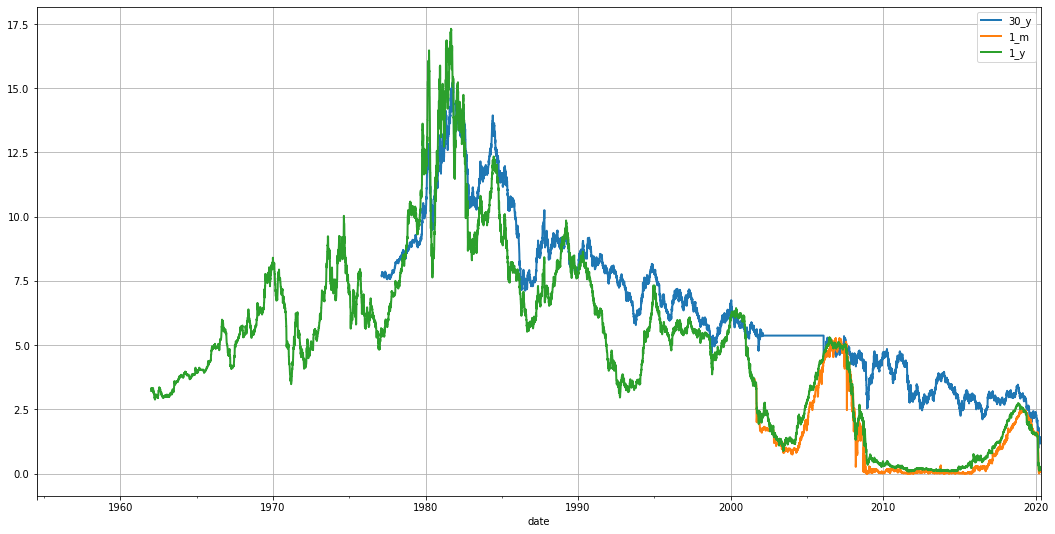

In [41]:
df.plot.line(y=['30_y','1_m','1_y'],figsize=(18,9),lw=2,grid=True);

## Time Resampling

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

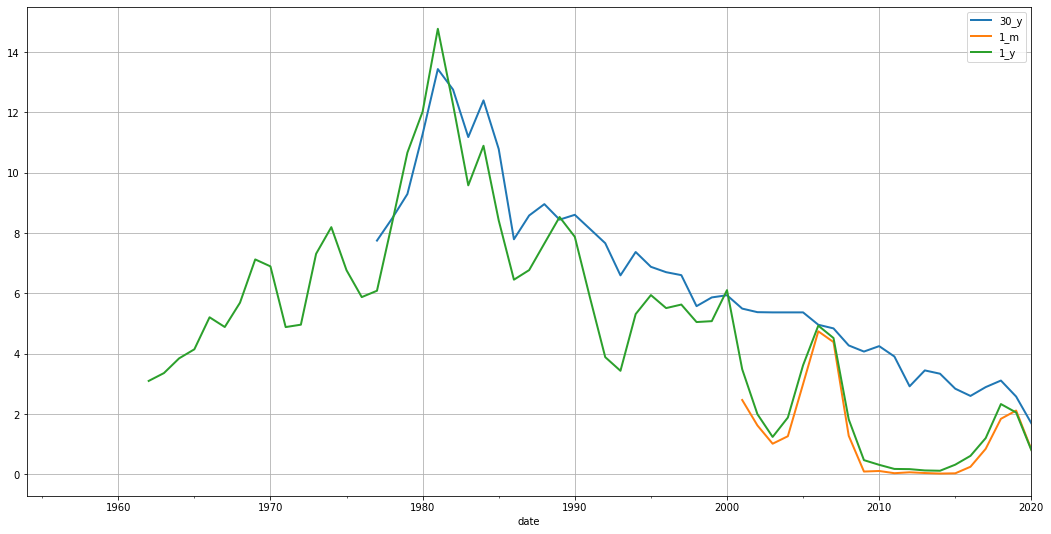

In [52]:
# daily to yearly
df.resample(rule='A').mean().plot.line(y=['30_y','1_m','1_y'],figsize=(18,9),lw=2,grid=True);

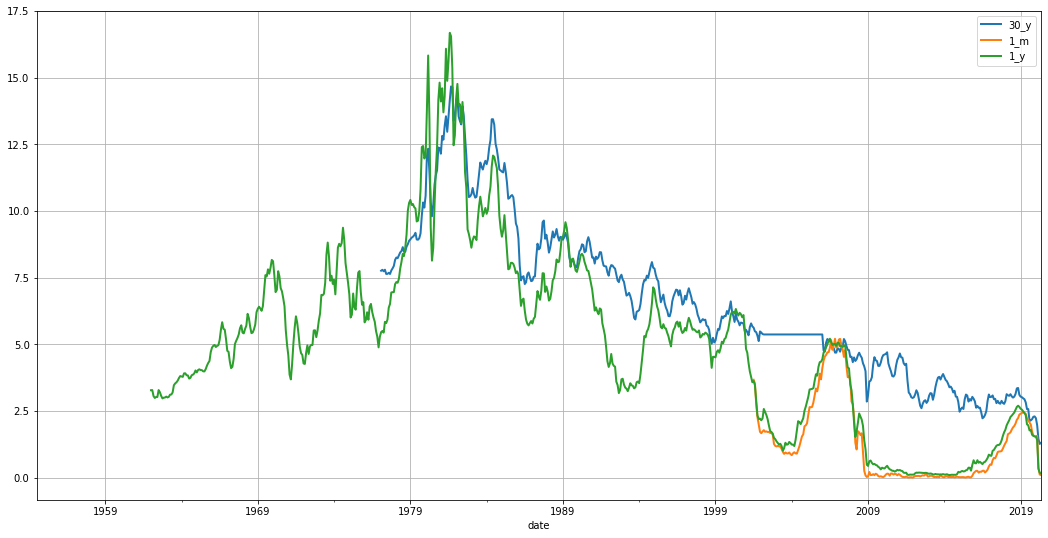

In [53]:
# daily to month
df.resample(rule='M').mean().plot.line(y=['30_y','1_m','1_y'],figsize=(18,9),lw=2,grid=True);

In [54]:
def first_day(entry):
    if len(entry):
        return(entry[0])

In [56]:
df.resample(rule='M').apply(first_day)

,date,1_m,3_m,6_m,1_y,2_y,3_y,5_y,7_y,10_y,20_y,30_y,recession,fredfunds
date,,,,,,,,,,,,,,
1954-07-31,1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80
1954-08-31,1954-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22
1954-09-30,1954-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06
1954-10-31,1954-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85
1954-11-30,1954-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,2020-01-01,1.48,1.55,1.60,1.59,1.58,1.62,1.69,1.83,1.92,2.25,2.39,0.0,1.55
2020-02-29,2020-02-01,1.56,1.55,1.54,1.45,1.33,1.30,1.32,1.42,1.51,1.83,1.99,0.0,1.58
2020-03-31,2020-03-01,1.45,1.27,1.11,0.97,0.86,0.85,0.89,1.03,1.13,1.46,1.65,0.0,0.65


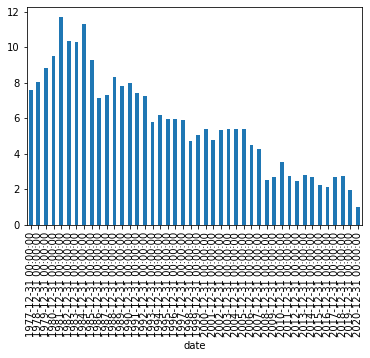

In [67]:
df['30_y'].dropna().resample('A').min().plot.bar();

## Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [80]:
df.rolling(window=30).median()

,1_m,3_m,6_m,1_y,2_y,3_y,5_y,7_y,10_y,20_y,30_y,recession,fredfunds
date,,,,,,,,,,,,,
1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,0.1,0.12,0.150,0.170,0.2,0.260,0.36,0.530,0.640,1.05,1.27,0.0,0.05
2020-05-08,0.1,0.12,0.145,0.170,0.2,0.260,0.36,0.530,0.640,1.05,1.27,0.0,0.05
2020-05-09,0.1,0.12,0.140,0.170,0.2,0.260,0.36,0.525,0.640,1.05,1.27,0.0,0.05


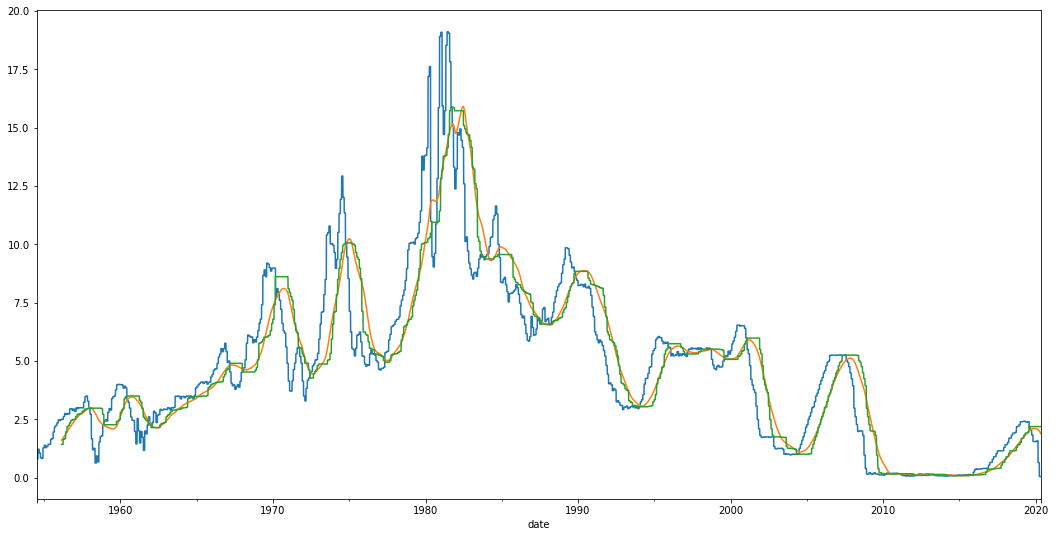

In [84]:
df['fredfunds'].plot(figsize=(18,9)).autoscale(axis='x',tight=True);
df.rolling(window=600).mean()['fredfunds'].plot();
df.rolling(window=600).median()['fredfunds'].plot();

In [85]:
df['fredfunds'].rolling(window=600).mean()

date
1954-07-01         NaN
1954-07-02         NaN
1954-07-03         NaN
1954-07-04         NaN
1954-07-05         NaN
                ...   
2020-05-07    1.894483
2020-05-08    1.891317
2020-05-09    1.888150
2020-05-10    1.884983
2020-05-11    1.881817
Name: fredfunds, Length: 24057, dtype: float64

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

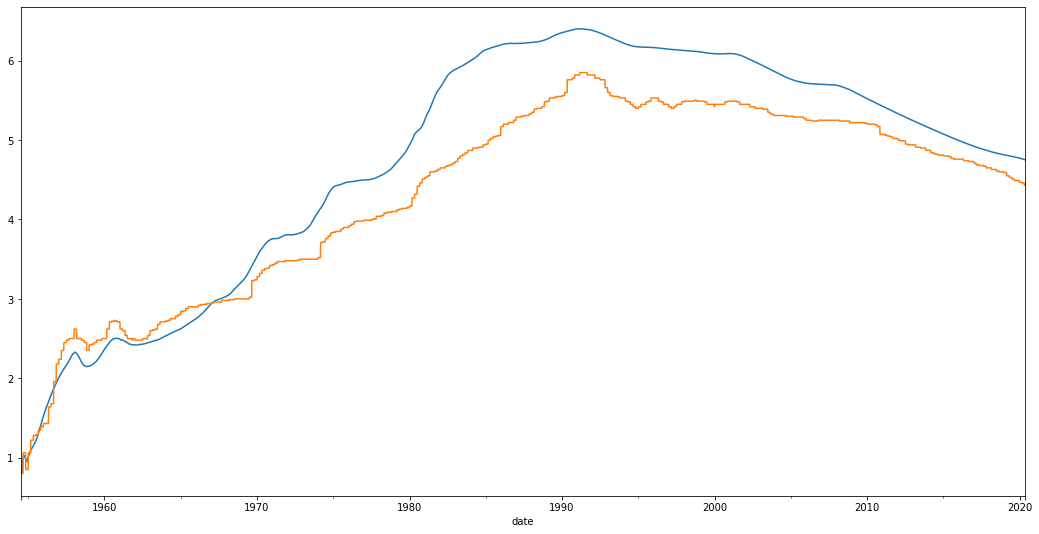

In [87]:
df['fredfunds'].expanding().mean().plot(figsize=(18,9)).autoscale(axis='x',tight=True);
df['fredfunds'].expanding().median().plot(figsize=(18,9)).autoscale(axis='x',tight=True);